## Coarse-graining Markov Chains

Taking every nth sample produced from a Markov chain obviously changes the new, "coarse-grained" Markov chain. However, such systems tend towards **fixed points** : after a certain number of coarse-graining iterations, they will stop changing much and converge to one description. The Markov chain at the limit has a very simple structure. Each state becomes independent of the previous state: each incoming arrow to a state has the same weight (note, *not* for different states).

In the case of a 6-dimensional (for 3 states) Markov chain, at the limit you only need 2 parameters.

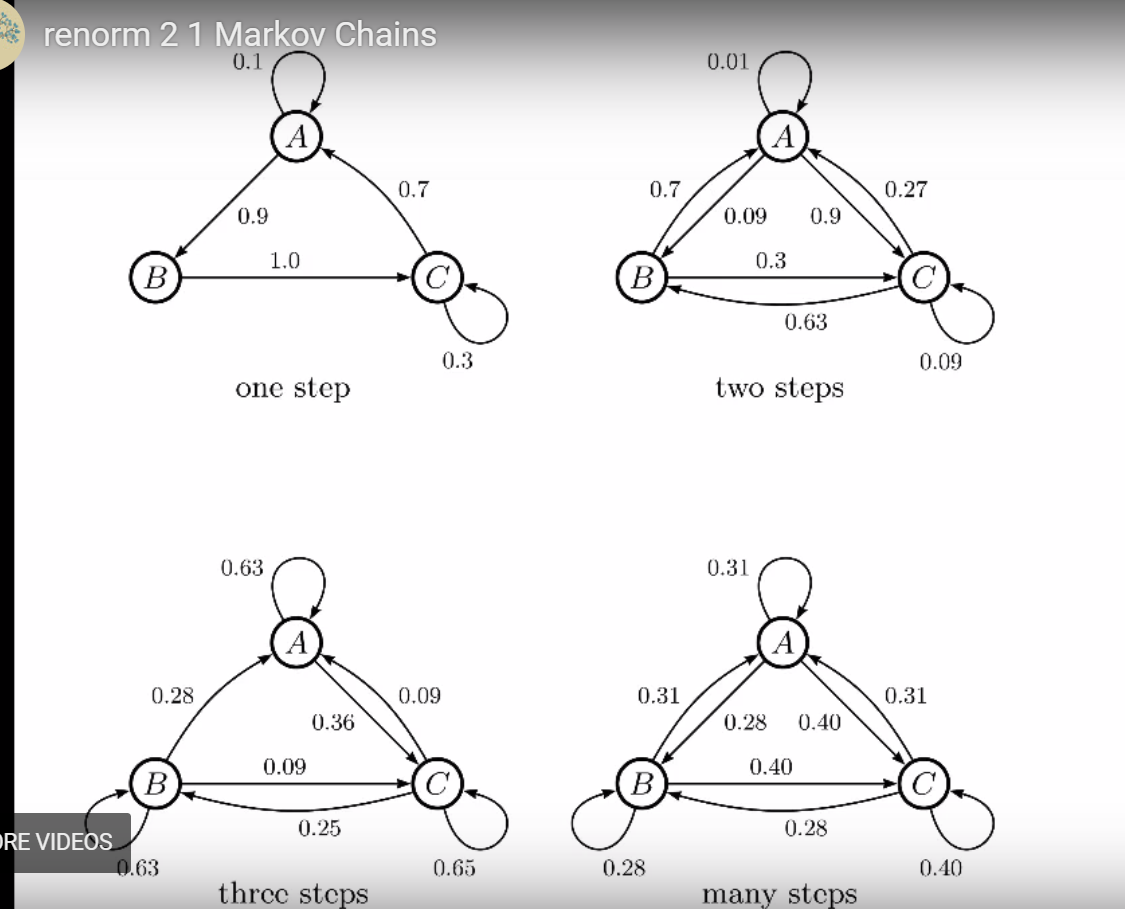

### Make rigorous good by Linear Algebra

In [1]:
using LightGraphs
using GraphPlot, Compose

ϵ = 0.2
T = [ϵ 1-ϵ; # adjacency matrix
     1-ϵ ϵ]
g = Graph(T)

┌ Info: Recompiling stale cache file C:\Users\ares\.julia\compiled\v1.0\LightGraphs\Xm08G.ji for LightGraphs [093fc24a-ae57-5d10-9952-331d41423f4d]
└ @ Base loading.jl:1190
┌ Info: Recompiling stale cache file C:\Users\ares\.julia\compiled\v1.0\GraphPlot\bUwXr.ji for GraphPlot [a2cc645c-3eea-5389-862e-a155d0052231]
└ @ Base loading.jl:1190


{2, 3} undirected simple Int64 graph

We can use p(A), p(B) as our variables, transformed by the adjacency matrix. This becomes

- p(A|A)p(A) + p(A|B)p(B)

- p(B|A)p(A) + p(B|B)p(B)

As the matrix evolving the variables in time is made of probabilities, and it evolves probabilities, it's called a *stochastic matrix*. Each column has to sum to 1.

If you coarse-grain the evolution matrix (i.e. by taking every Nth measurement), you're raising the evolution matrix to the power N. For N = 2:

$$ T^2 = \begin{pmatrix} \epsilon^2 + (1-\epsilon)^2 & .. \\ .. & .. \end{pmatrix} $$

In [85]:
ϵ^2 + (1-ϵ)^2

0.6800000000000002

### The general case

We take the Eigenvectors of T

$$ Tv = \lambda v $$

We will express an arbitrary probability distribution as a weighted sum of the eigenvectors:

$$ P = \alpha_1 v_1 + \alpha_2 v_2 \ \ \ (1) $$ 

As a linear system, the matrix T now becomes diagonal:

$$ \begin{pmatrix} 1 & 0 \\ 0 & 2 \epsilon - 1 \end{pmatrix} \begin{pmatrix} \alpha_1 \\ \alpha_2 \end{pmatrix} = \begin{pmatrix} \alpha_1 \\ (2 \epsilon - 1 ) \alpha_2 \end{pmatrix} $$


Any stochastic matrix will have as its largest eigenvalue something whos absolute value is 1 (can be negative or imaginary etc.), and the others will be smaller.

When you raise $\hat{T}$ to the Nth power, you get

$$ \hat{T} = \begin{pmatrix} 1 & 0 \\ 0 & (2 \epsilon - 1)^N \end{pmatrix} $$

As you increase N, you'll find that the second row of $\begin{pmatrix} \alpha_1 \\ (2 \epsilon - 1 ) \alpha_2 \end{pmatrix}$ tends to 0. I.e. it will map the probability distribution (1) and map it to the first eigenvector:

$$ P = \alpha_1 v_1 $$

The first eigenvector is thus called the ***stationary distribution*** of the original stochastic matrix. This is equivalent to the probability of finding yourself in a state after many timesteps ( <- copied from quiz question i got wrong). 

Going back to the original graph, your adjacency matrix now is

$$\hat{A} = \begin{pmatrix} pA & 1 - pA \\ pA & 1 - pA \end{pmatrix} $$


You thus boil down to a single parameter, pA

You can visualize this using the ***phase diagram*** of the Markov chain:

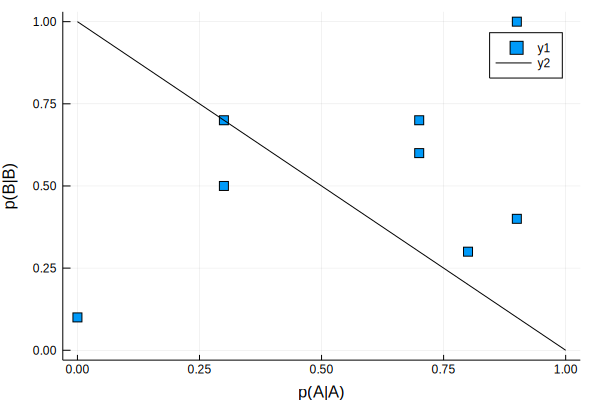

In [130]:
xs, ys = 0:0.1:1, 0:0.1:1

pts = [[rand(xs), rand(ys)] for k in 1:8]; # random points
pts = reduce(hcat, pts)
using Plots
scatter(pts[1,:], pts[2,:]; marker=:square)
plot!(xs, 1 .- collect(xs); color=:black)
xlabel!("p(A|A)")
ylabel!("p(B|B)")

Each point corresponds to a different model of the Markov chain. The points on the diagonal line represent the **fixed point** of the coarse-graining, where the models will flow as $N \rightarrow \infty $:

$$ p(A|A) = 1 - P(B|B) $$ 

i.e. P(A) becomes the stationary distribution, and P(B) is just 1 - P(A) 

For this flow to work, you need:

- First eigenvalue == 1 

- Models need to start somewhere away from the corners

### Origin of the "Slippy Counter"

Let's say you want to find a matrix that works at a finer timescale than what your current model uses / what you thought.

We thus set $A^2 = T$, where T is the matrix we've come up with. Let's assume T is given by the matrix form shown above. Now A is 

$$ A = \begin{pmatrix} a & 1-b \\ 1-a & b \end{pmatrix} $$

Squaring A and setting it equal to T:

$$ A^2 = \begin{pmatrix} a^2 + (1-b)(1-a) & a(1-b)+b(1-b) \\ a(1-a)+b(1-a) & (1-a)(1-b) + b^2 \end{pmatrix} = T $$

The only way to satisfy this is for a and b to be equal.

Setting $a^2 + (1-a)^2 = \epsilon$

$$ 2a^2 - 2a + (1-\epsilon) = 0 $$

$$ a = \frac{2 \pm \sqrt{4 - 8(1-\epsilon)}}{4} $$

$$ a = \frac{1}{2} \pm \frac{1}{2} \sqrt{1 - 2(1-\epsilon)} $$

Let's say that $\epsilon = \frac{1}{4}$. We'd have

$$ a = \sqrt{1 - \frac{1}{2}} => - \sqrt{\frac{1}{2}} $$

So the only way to satisfy this condition would be for a to have complex entries. It thus cannot correspond to any natural stochastic matrix (since we interpret the entries as transition probabilities).

If $\epsilon$ is smaller than $\frac{1}{2}$, then T could not have been generated by any finer-scaled *two-state* system. To overcome this, we cleverly introduce more states. 

If the system is a "good counter", i.e. the sequence is ABABABABA, i.e. $\epsilon$ is small, then we wouldn't know how to fill in measurements from a finer grain sampling:

A?B?A?B?A.... 

If we filled e.g. the first gap with A, then we assume it went AAB. If it's deterministic, then how could it "know" that the times it becomes A are different to each other? Recall that Markov chains are memory-less, so this could not be accomodated. 

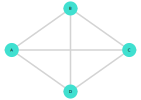

In [24]:
using LinearAlgebra
A = Symmetric(rand(4,4))
g = Graph(A)
gplot(g, nodelabel=["C","D","A","B"],layout=circular_layout)

The system actually splits up into two systems:

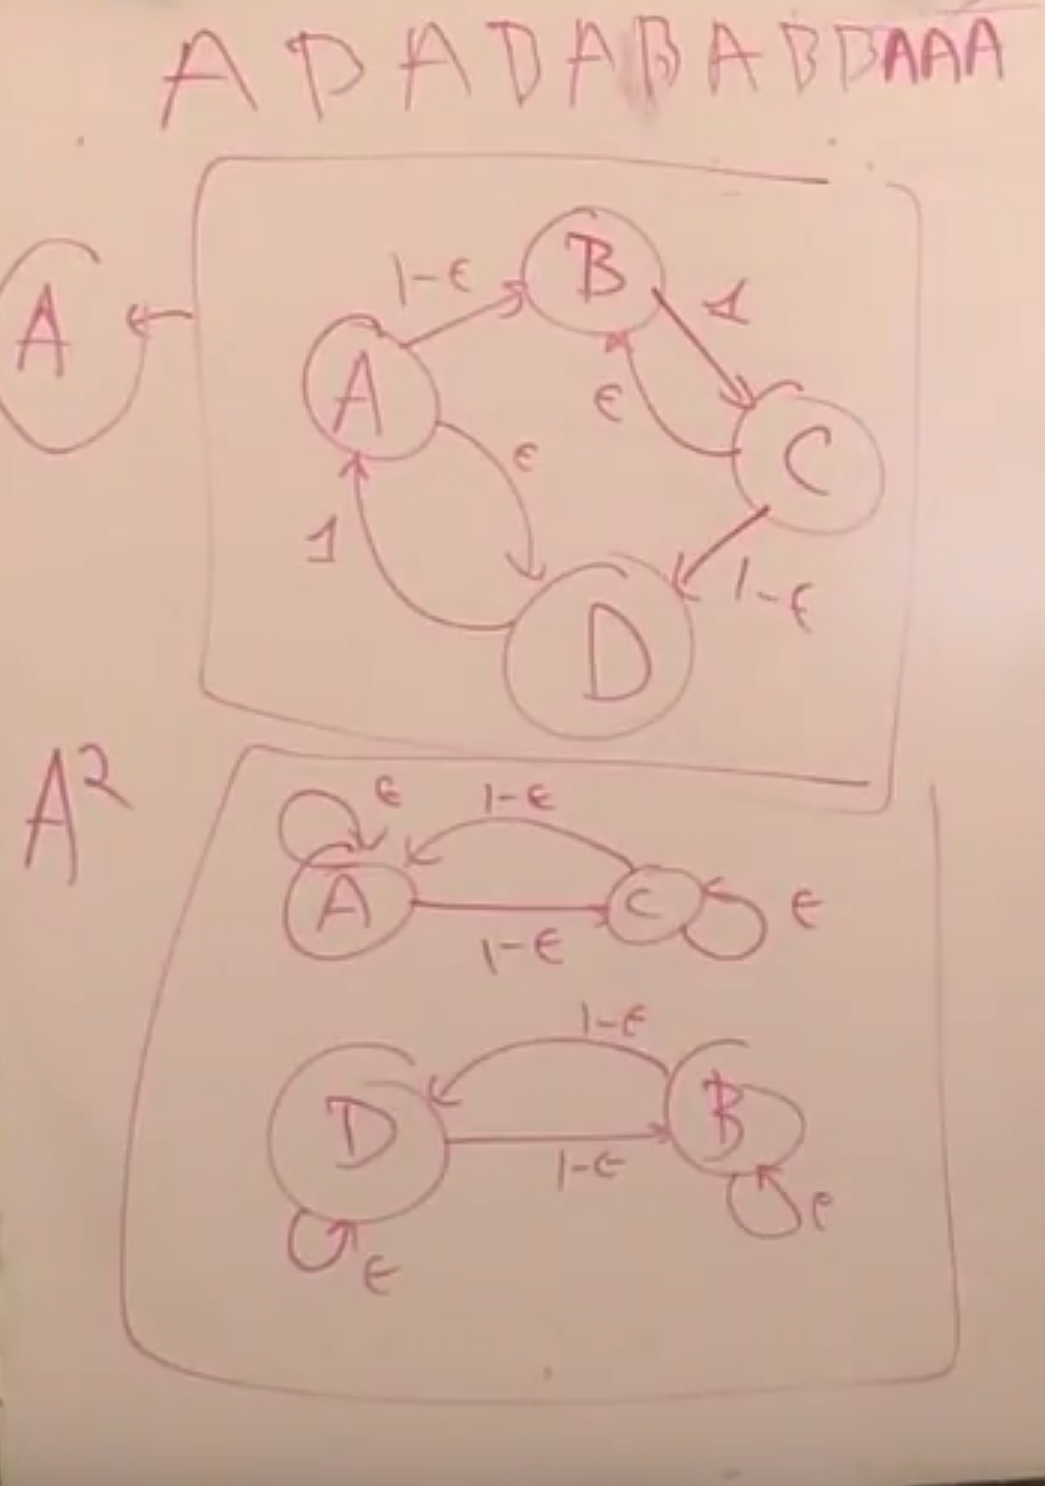

This is equivalent to the original model T, as long as we do the coarse graining **A, D equivalent to A**, **C, B equivalent to B**. 

Sometimes a matrix/model could have originated outside the original model space. With a coarse-grained model, you usually have to assume that finer-grain descriptions of it have "more memory", i.e. more actual states.